### Attempt 1: Chignolin, automatic assembly

In [1]:
from pyclops import ChemicalLossHandler
from pyclops.visualization.nglview import NGLViewVisualizer

In [3]:
chig_pdb = '/Users/bendupontjr/mphil_files/all_mphil_code/pyclops/examples/pdbs/chignolin.pdb'
clh = ChemicalLossHandler.from_pdb_file(chig_pdb, units_factor = 1.0)

print(clh.summary)

visualizer = NGLViewVisualizer(chig_pdb, units_factor = 1.0)

AmideAspHead [0, 2] (x2 resonance groups), AmideGluHead [0, 4] (x2 resonance groups), AmideHead2Tail [0, 9] (x2 resonance groups), AspCTerm [2, 9] (x4 resonance groups), AspGlu [2, 4] (x4 resonance groups), GluCTerm [4, 9] (x4 resonance groups)


In [4]:
loss = clh._chemical_losses[3]
print(loss.method)

visualizer.visualize_loss_atoms(loss, highlight_scale=0.6)

AmideGluHead


NGLWidget()

### Parsing a RDKit molecule

In [5]:
import MDAnalysis as mda
import MDAnalysis.converters.RDKitParser as RDKitParser
import rdkit.Chem as Chem

In [8]:
pdb_file = '/Users/bendupontjr/mphil_files/all_mphil_code/pyclops/examples/pdbs/chignolin.pdb'
mol = Chem.MolFromPDBFile(pdb_file, sanitize=True, removeHs=True)

#u = RDKitParser.RDKitParser(pdb_file)

mol.GetAtomWithIdx(5).GetPDBResidueInfo().GetResidueName()

#mol.GetAtomWithIdx(12).GetPDBResidueInfo().GetName().strip()

'TYR'

In [9]:
mol.GetAtomWithProp('resname')

AttributeError: 'Mol' object has no attribute 'GetAtomWithProp'

In [43]:
len(mol.GetAtoms())

93

### Testing the Structure Maker

In [1]:
from pyclops import ChemicalLossHandler
from pyclops.structure import StructureMaker
from rdkit.Chem import AllChem

In [9]:
cys_ala_5_cys_pdb = "/Users/bendupontjr/mphil_files/all_mphil_code/pyclops/examples/pdbs/CysAla5Cys.pdb"

chem_loss_handler = ChemicalLossHandler.from_pdb_file(cys_ala_5_cys_pdb, units_factor = 1.0)

print(chem_loss_handler.summary)

struct_mkr = StructureMaker(chem_loss_handler)

amide_head2tail = chem_loss_handler.chemical_losses[1]
disulfide_loss = chem_loss_handler.chemical_losses[-1]
cys_cterm_loss = chem_loss_handler.chemical_losses[-2]

AmideHead2Tail [0, 6] (x2 resonance groups), CysCTerm [0, 6] (x2 resonance groups), Disulfide [0, 6]


/Users/bendupontjr/opt/anaconda3/envs/pyclops_dev/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/Users/bendupontjr/opt/anaconda3/envs/pyclops_dev/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


[20:26:45] Molecule does not have explicit Hs. Consider calling AddHs()
[20:26:45] Molecule does not have explicit Hs. Consider calling AddHs()


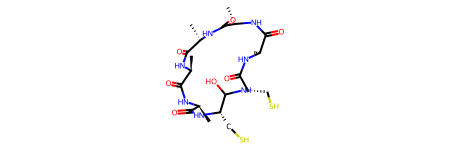

In [10]:
mol = struct_mkr.make_structure(amide_head2tail)

AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

mol

[20:26:46] Molecule does not have explicit Hs. Consider calling AddHs()
[20:26:47] Molecule does not have explicit Hs. Consider calling AddHs()


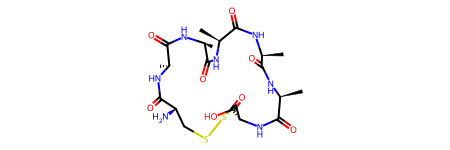

In [11]:
mol = struct_mkr.make_structure(disulfide_loss)
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

mol

[20:26:51] Molecule does not have explicit Hs. Consider calling AddHs()
[20:26:51] Molecule does not have explicit Hs. Consider calling AddHs()


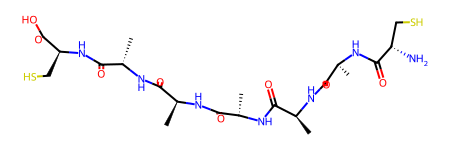

In [12]:
mol = struct_mkr.initial_rdkit_mol
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

mol

[20:27:32] Molecule does not have explicit Hs. Consider calling AddHs()
[20:27:32] Molecule does not have explicit Hs. Consider calling AddHs()


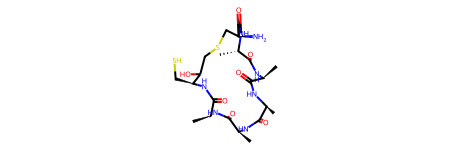

In [15]:
mol = struct_mkr.make_structure(cys_cterm_loss)
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

mol

In [6]:
chig_pdb_file = '/Users/bendupontjr/mphil_files/all_mphil_code/pyclops/examples/pdbs/chignolin.pdb'

chem_loss_handler = ChemicalLossHandler.from_pdb_file(chig_pdb_file, units_factor = 1.0)

print(chem_loss_handler.summary)

glu_cterm = chem_loss_handler.chemical_losses[-2]

struct_mkr = StructureMaker(chem_loss_handler)

AmideAspHead [0, 2] (x2 resonance groups), AmideGluHead [0, 4] (x2 resonance groups), AmideHead2Tail [0, 9] (x2 resonance groups), AspCTerm [2, 9] (x4 resonance groups), AspGlu [2, 4] (x4 resonance groups), GluCTerm [4, 9] (x4 resonance groups)


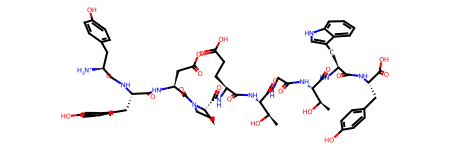

In [7]:
struct_mkr.initial_rdkit_mol

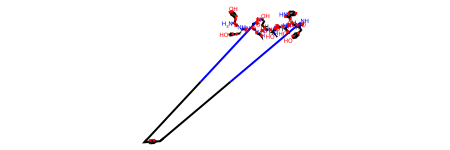

In [8]:
mol = struct_mkr.make_structure(glu_cterm)

#AllChem.EmbedMolecule(mol, AllChem.ETKDG())
#AllChem.MMFFOptimizeMolecule(mol)

mol